In [ ]:
! pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Checking if tensorflow is properly installed or not
import tensorflow
print(tensorflow.__version__)

2.8.2


In [ ]:
#Installing all necessary dependencies
import os
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 15s 0us/step


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [ ]:
#Loading the cifar dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Split the training set into train and validation
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=5000, random_state=44)

In [ ]:
x_train.shape

(45000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
x_val.shape

(5000, 32, 32, 3)

In [ ]:
# Normalize pixel values to be between 0 and 1
x_train, x_test, x_val = x_train / 255.0, x_test / 255.0, x_val /255.0

In [ ]:
#These are all the classes the images in cifar dataset belongs to.
#The numbers associated for each class starts from 0, 1.. upto 9
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

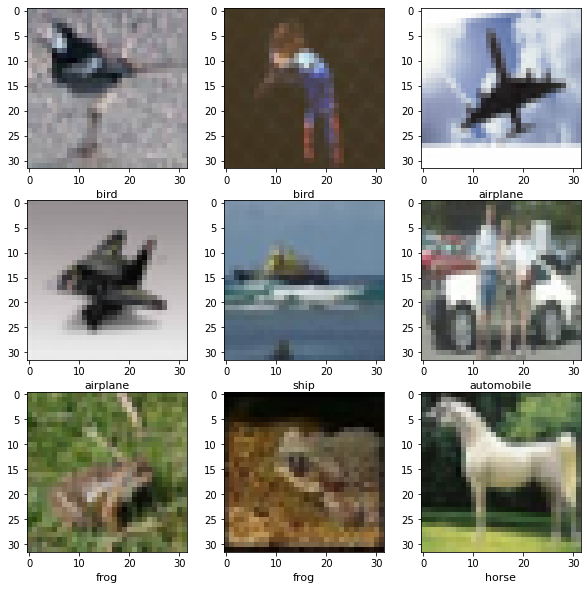

In [ ]:
# Displaying few of images from train data set
plt.figure(figsize=(10,10))
num_rows = 3
num_columns = 3
num_images = num_rows * num_columns
for i in range(num_images):
  plt.subplot(num_rows, num_columns, i+1)
  plt.xlabel(class_names[y_train[i][0]],fontsize=11)
  plt.imshow(x_train[i])
plt.show()

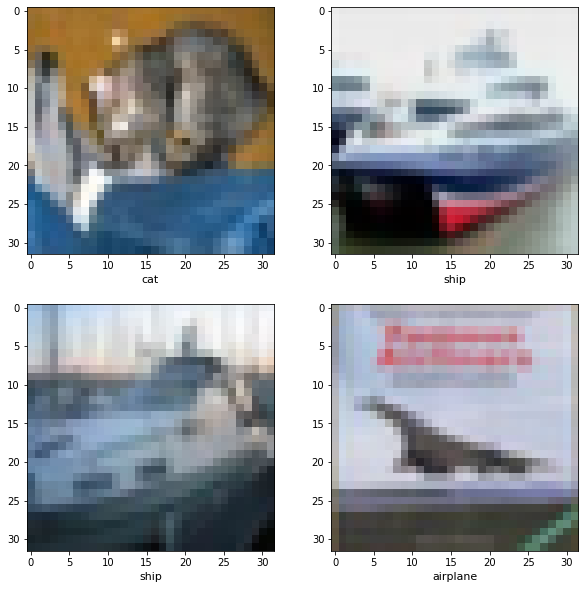

In [ ]:
# Displaying few of images from test data set
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
num_rows = 2
num_columns = 2
num_images = num_rows * num_columns
for i in range(num_images):
  plt.subplot(num_rows, num_columns, i+1)
  plt.xlabel(class_names[y_test[i][0]],fontsize=11)
  plt.imshow(x_test[i])
plt.show()

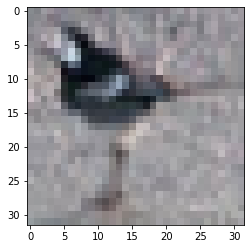

In [ ]:
plt.imshow(x_train[0])

In [ ]:
y_train[0]

array([2], dtype=uint8)

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 32)          0

In [ ]:
# Early stop/ callbacks
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3,verbose = 1, mode = 'min')

In [ ]:
history = model.fit(x_train, y_train, validation_data = [x_val,y_val], callbacks = [es], epochs = 25)

Epoch 1/25
1407/1407 [==============================] - 18s 4ms/step - loss: 1.7249 - accuracy: 0.3598 - val_loss: 1.4278 - val_accuracy: 0.4982
Epoch 2/25
1407/1407 [==============================] - 6s 4ms/step - loss: 1.4089 - accuracy: 0.4890 - val_loss: 1.2980 - val_accuracy: 0.5308
Epoch 3/25
1407/1407 [==============================] - 6s 4ms/step - loss: 1.2999 - accuracy: 0.5354 - val_loss: 1.1946 - val_accuracy: 0.5772
Epoch 4/25
1407/1407 [==============================] - 6s 4ms/step - loss: 1.2421 - accuracy: 0.5536 - val_loss: 1.1099 - val_accuracy: 0.6038
Epoch 5/25
1407/1407 [==============================] - 7s 5ms/step - loss: 1.1894 - accuracy: 0.5746 - val_loss: 1.0849 - val_accuracy: 0.6124
Epoch 6/25
1407/1407 [==============================] - 6s 4ms/step - loss: 1.1490 - accuracy: 0.5914 - val_loss: 1.0422 - val_accuracy: 0.6360
Epoch 7/25
1407/1407 [==============================] - 6s 4ms/step - loss: 1.1210 - accuracy: 0.5994 - val_loss: 1.0223 - val_accuracy

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8787 - accuracy: 0.6927


[0.8786600828170776, 0.6927000284194946]

In [ ]:
#Saving the model weights
model.save_weights('model.h5')

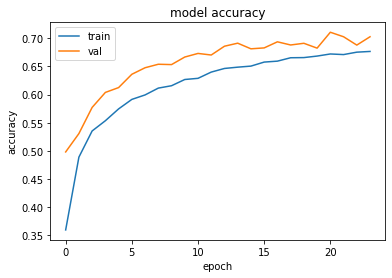

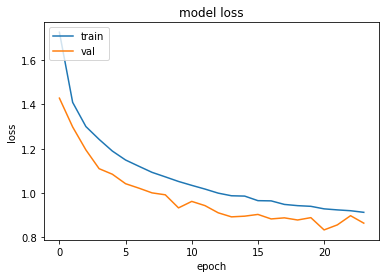

In [ ]:
#Plotting the accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

The predicted label by the model is truck


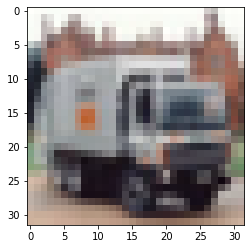

In [ ]:
labels = '''airplane automobile bird cat deer dog frog horse ship truck'''.split()
 
image_number = 11
 
# display the image
plt.imshow(x_test[image_number])
 
# load the image in an array
n = np.array(x_test[image_number])
 
# reshape it
p = n.reshape(1, 32, 32, 3)
 
# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]
 
 
# display the result
print("The predicted label by the model is",predicted_label)


In [ ]:
model_2.load_weights('/content/model.h5')